In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19all/train_week_two_data.csv
/kaggle/input/covid19all/train_with_continents.csv
/kaggle/input/covid19all/train_week_1_ahead.csv
/kaggle/input/last-week-covid/last week.csv


In [94]:
#let us start by reading the data using pandas
data = pd.read_csv ("../input/covid19all/train_with_continents.csv")

In [95]:
data1 = pd.read_csv ("../input/covid19all/train_week_1_ahead.csv")
data2 = pd.read_csv ("../input/covid19all/train_week_two_data.csv")
data3 = pd.read_csv("../input/last-week-covid/last week.csv")

In [96]:
'''lets look at whether the data is of the same size and shape so that we can append the necessary columns to the
latest dataset which is data2
'''
print('the size and shape of the data is:',data.shape,'and',data.size)
print('the size and shape of the data1 is:',data1.shape,'and',data1.size)
print('the size and shape of the data2 is:',data2.shape,'and',data2.size)
print('the size and shape of the data3 is:',data3.shape,'and',data3.size)

the size and shape of the data is: (10659, 6) and 63954
the size and shape of the data1 is: (11913, 5) and 59565
the size and shape of the data2 is: (13376, 5) and 66880
the size and shape of the data3 is: (14839, 5) and 74195


In [97]:
#lets look at how our data looks like for the first few rows
data3.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [98]:
#checking the data 1 which shows the week one after I joined the competition
data1.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [99]:
#checking the data 2 which shows the week two after I joined the competition
data2.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [100]:
#lets get the information we want to know about the whole data
display(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14839 entries, 0 to 14838
Data columns (total 5 columns):
Territory X Date    14839 non-null object
target              14839 non-null int64
cases               14839 non-null int64
Territory           14839 non-null object
Date                14839 non-null object
dtypes: int64(2), object(3)
memory usage: 579.8+ KB


None

In [101]:
'''looking at the above data2 we can see that the date column comes out as an object(string) lets change that for sth 
that is going to be easily used during EDA
'''
from datetime import datetime
#data2['Date'] = pd.to_datetime(data2['Date'], format = '%m/%d/%Y')
data3['Date'] = pd.to_datetime(data3['Date'])

In [102]:
#lets see if the data.dtype for the date column has changed
display(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14839 entries, 0 to 14838
Data columns (total 5 columns):
Territory X Date    14839 non-null object
target              14839 non-null int64
cases               14839 non-null int64
Territory           14839 non-null object
Date                14839 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 579.8+ KB


None

In [103]:
#lets look at the unique names for the columns and from there also the unique values so as to drop unwanted data
list(data3.columns)

['Territory X Date', 'target', 'cases', 'Territory', 'Date']

In [104]:
#dropping the repeated columns which are the last two
#repeated_columns_for_dropping = data[['Territory','Date']]
#data = data.drop(repeated_columns_for_dropping,axis = 1)

In [105]:
#lets look at the train data description to better understand the data
data3.describe()

,target,cases
count,14839.000000,14839.000000
mean,32.381427,775.141047
std,375.334595,6906.907700
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,7.000000
max,13155.000000,213372.000000


In [106]:
print("Number of Territories: ", data['Territory'].nunique())
print("Number of Territories: ", data1['Territory'].nunique())
print("Number of Territories: ", data2['Territory'].nunique())
print("Number of Territories: ", data3['Territory'].nunique())
print("Dates go from day", max(data['Date']), "to day", min(data['Date']), ", a total of", data['Date'].nunique(), "days")
print("Dates go from day", max(data1['Date']), "to day", min(data1['Date']), ", a total of", data1['Date'].nunique(), "days")
print("Dates go from day", max(data2['Date']), "to day", min(data2['Date']), ", a total of", data2['Date'].nunique(), "days")
print("Dates go from day", max(data3['Date']), "to day", min(data3['Date']), ", a total of", data3['Date'].nunique(), "days")
#our data has no states
#print("Countries with Province/State informed: ", data[data['Province/State'].isna()==False]['Country/Region'].unique())

Number of Territories:  209
Number of Territories:  209
Number of Territories:  209
Number of Territories:  209
Dates go from day 3/9/2020 to day 1/22/2020 , a total of 51 days
Dates go from day 3/9/20 to day 1/22/20 , a total of 57 days
Dates go from day 3/9/20 to day 1/22/20 , a total of 64 days
Dates go from day 2020-04-01 00:00:00 to day 2020-01-22 00:00:00 , a total of 71 days


In [107]:
'''#let us look at these territories just to make sure that each stands on its own
we actually do not need thia cell so we can do away with it
print(data['Territory'].nunique())
print(data2['Territory'].nunique())
'''

"#let us look at these territories just to make sure that each stands on its own\nwe actually do not need thia cell so we can do away with it\nprint(data['Territory'].nunique())\nprint(data2['Territory'].nunique())\n"

In [108]:
#from the above data we can see that each country appears only once 
#lets see the number of entries per Territory
data['Territory'].value_counts()
data1['Territory'].value_counts()
data2['Territory'].value_counts()
data3['Territory'].value_counts()

Canada                                    71
Congo (the)                               71
Democratic Republic of the Congo (the)    71
South Africa                              71
Panama                                    71
                                          ..
Liberia                                   71
Mozambique                                71
Bangladesh                                71
Malta                                     71
Romania                                   71
Name: Territory, Length: 209, dtype: int64

In [109]:
'''# produces Pandas Series
data.groupby('month')['duration'].sum() 
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()
'''

"# produces Pandas Series\ndata.groupby('month')['duration'].sum() \n# Produces Pandas DataFrame\ndata.groupby('month')[['duration']].sum()\n"

Text(0.5, 0, 'Date')

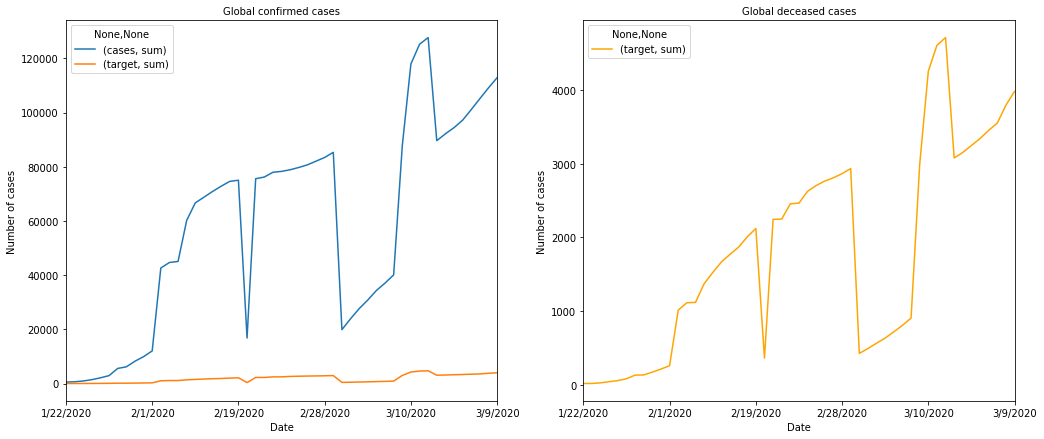

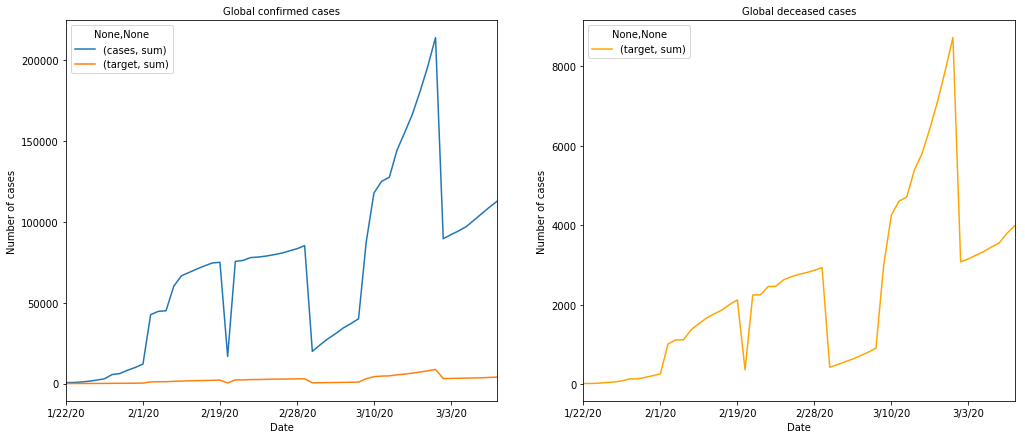

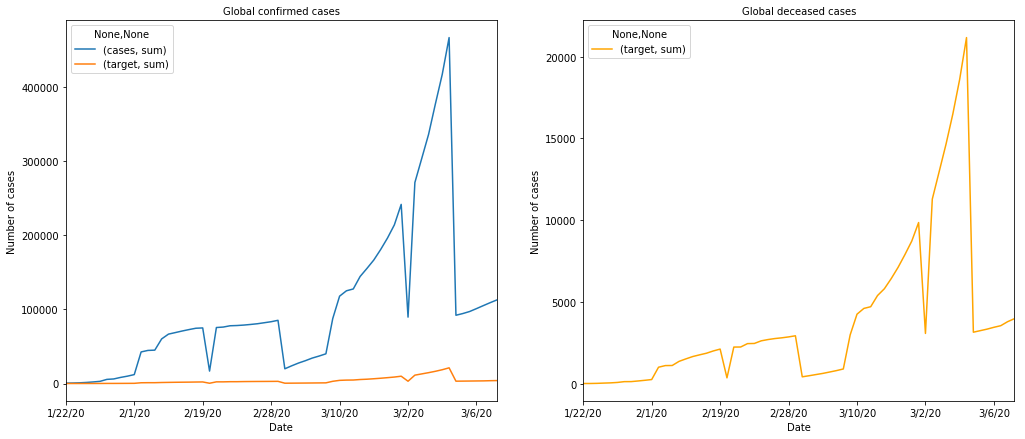

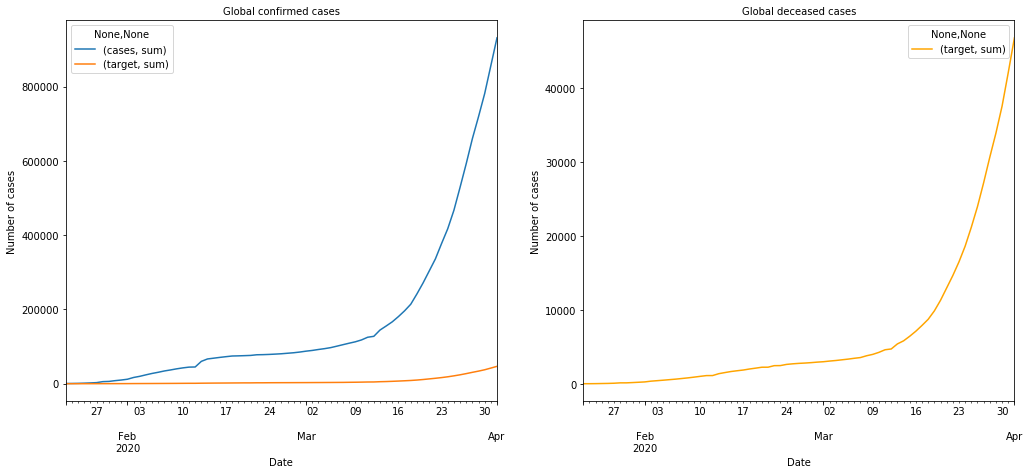

In [110]:
#lets check the number of deaths and infected confirmed cases by using plots
#importing the necessary dependency
import matplotlib.pyplot as plt
#for week one

confirmed_total_date = data.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week  two
confirmed_total_date = data1.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data1.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week three 
confirmed_total_date = data2.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data2.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)


#for the last week 
confirmed_total_date = data3.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data3.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

we know that the virus originated from china so we can use this to compare with the China graph for both the confirmed cases against the deaths and check if the graphs flow the same remembering that during some time china changed how it considered whether somebody was considered positive (11/03/2020).This may be registered as a spike and considering other policies that are put in place that may likely affect the number of cases of the infected people.


Text(0.5, 0, 'Date')

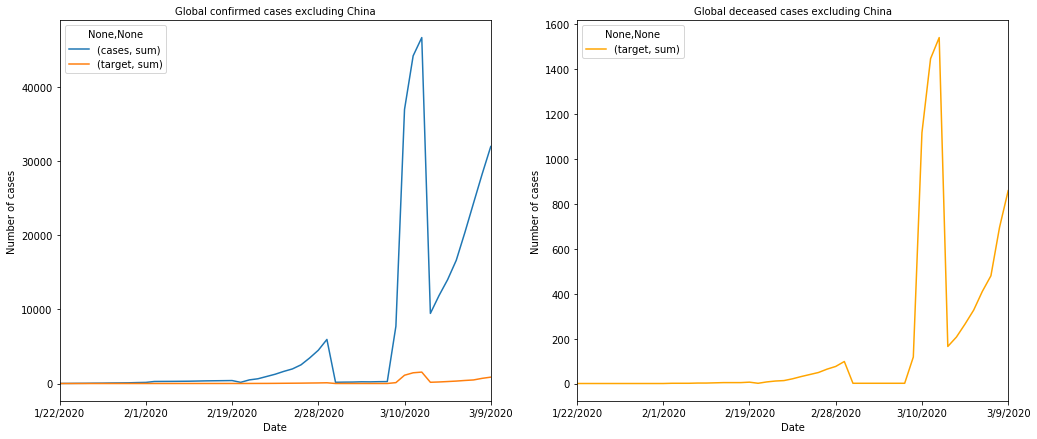

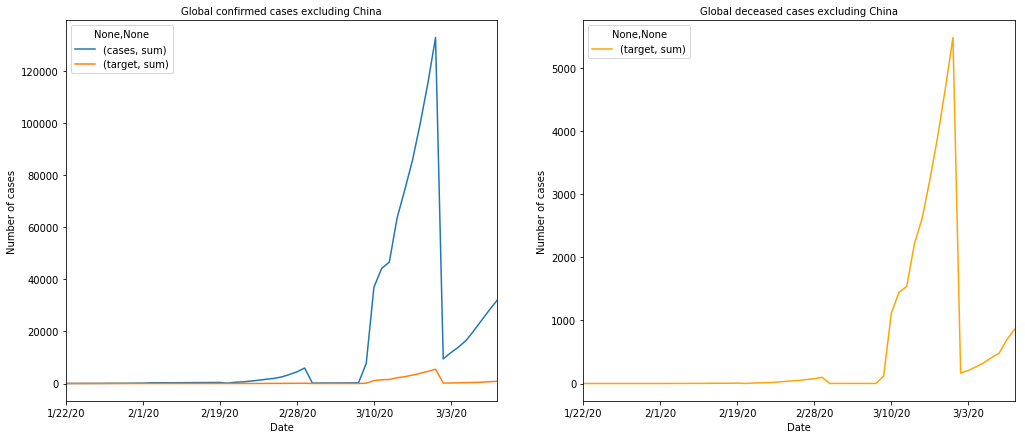

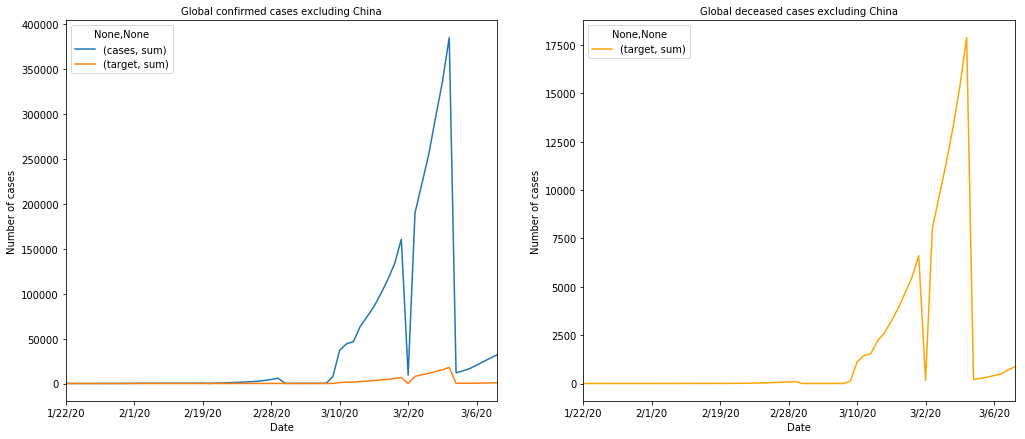

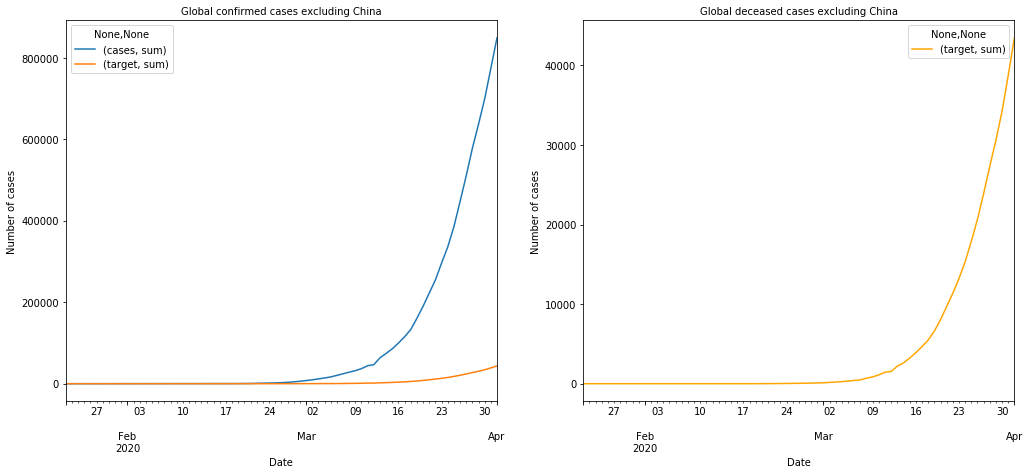

In [111]:
#lets draw the curve excluding china
#for week one
confirmed_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week two 
confirmed_total_date_noChina = data1[data1['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data1[data1['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week 3
confirmed_total_date_noChina = data2[data2['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data2[data2['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)


#for last week
confirmed_total_date_noChina = data3[data3['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data3[data3['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Without China we should be getting a smoother curve as which more or less looks like the SIR model for epidemiology where there is a steep rise then a gentle drop in the number of cases but remember that unlike other countries that can learn from China,China had no prior warning of the contagion.

Text(0.5, 0, 'Date')

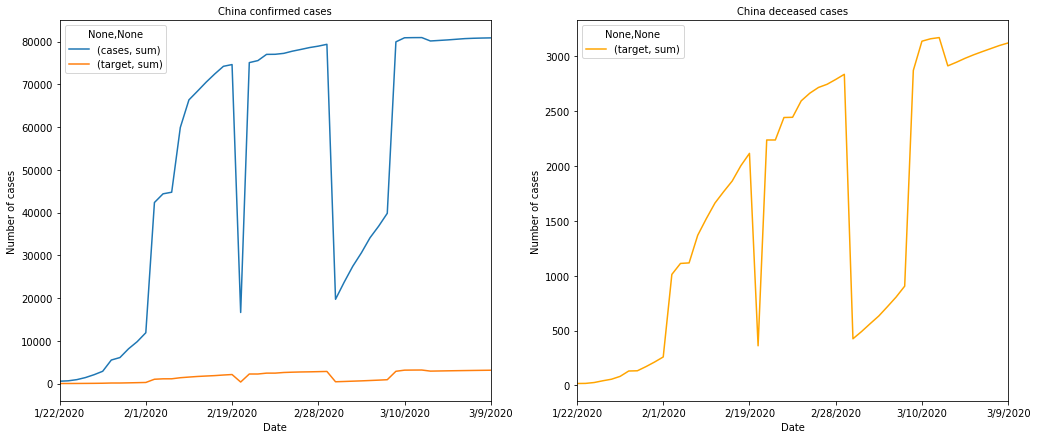

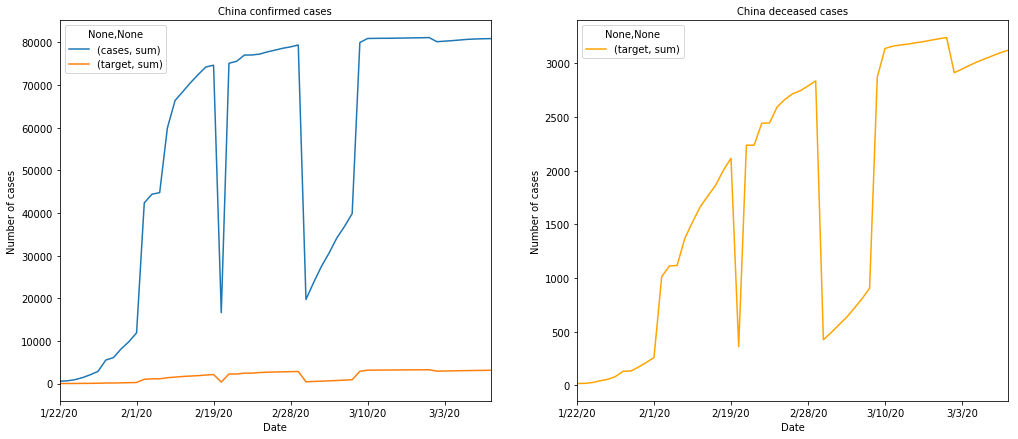

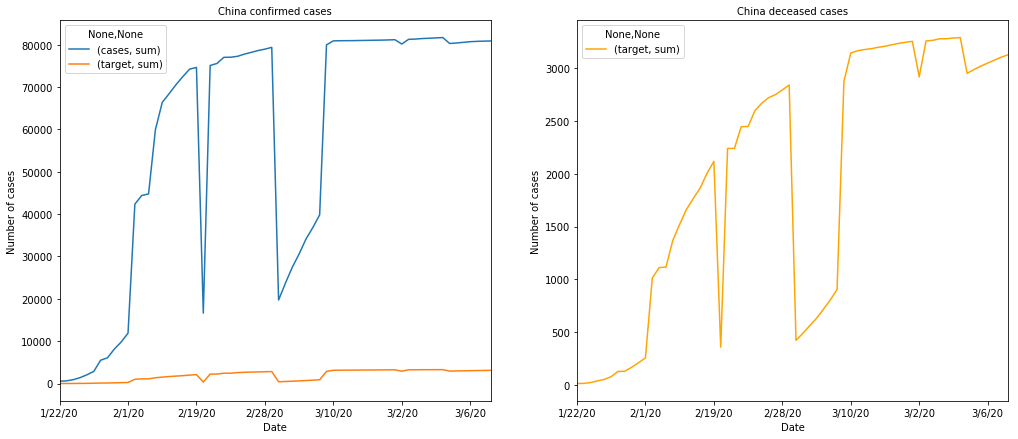

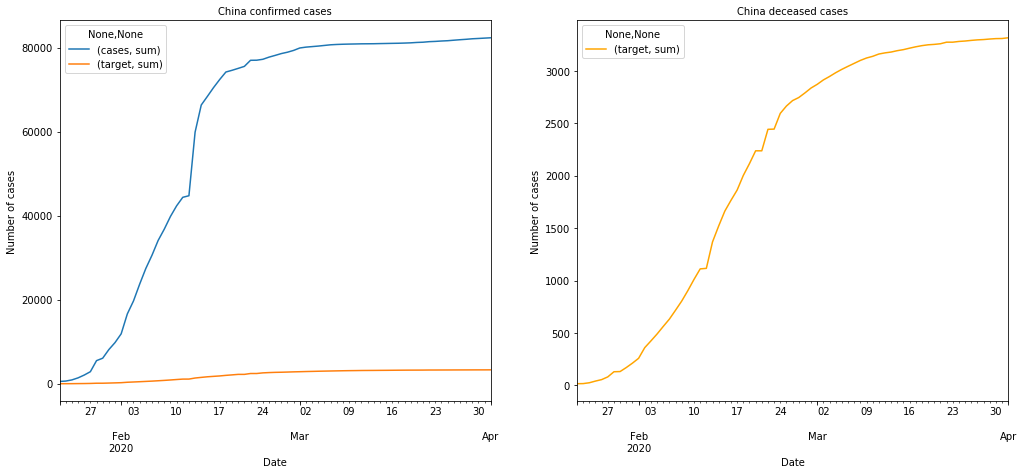

In [112]:
#for week one
confirmed_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)
#for week two
confirmed_total_date_China = data1[data1['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data1[data1['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week 3
confirmed_total_date_China = data2[data2['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data2[data2['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for last week of the prediction
confirmed_total_date_China = data3[data3['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data3[data3['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Text(0.5, 0, 'Date')

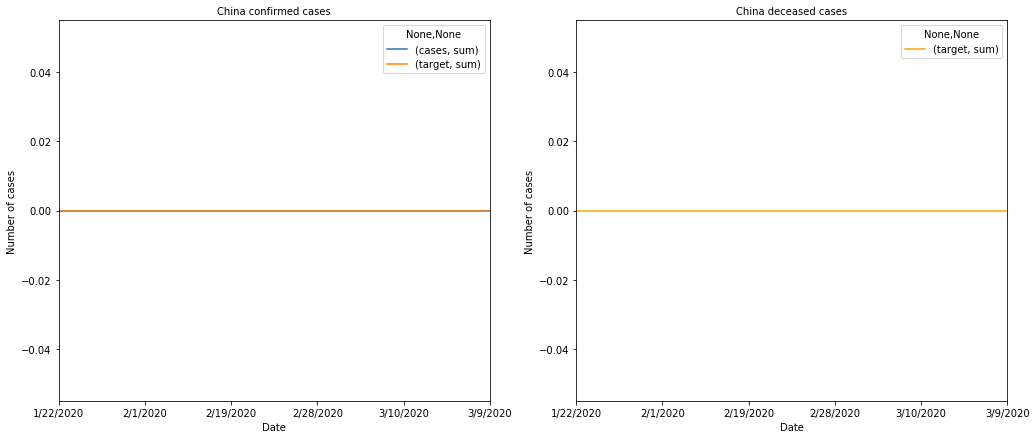

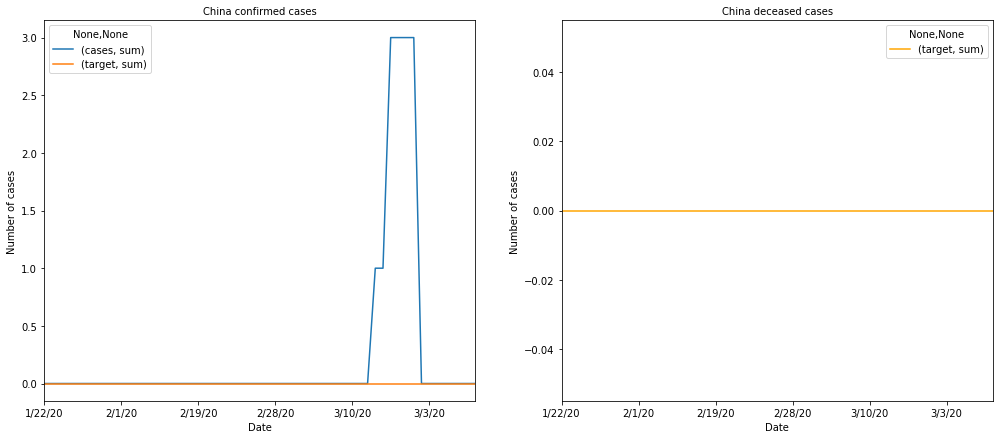

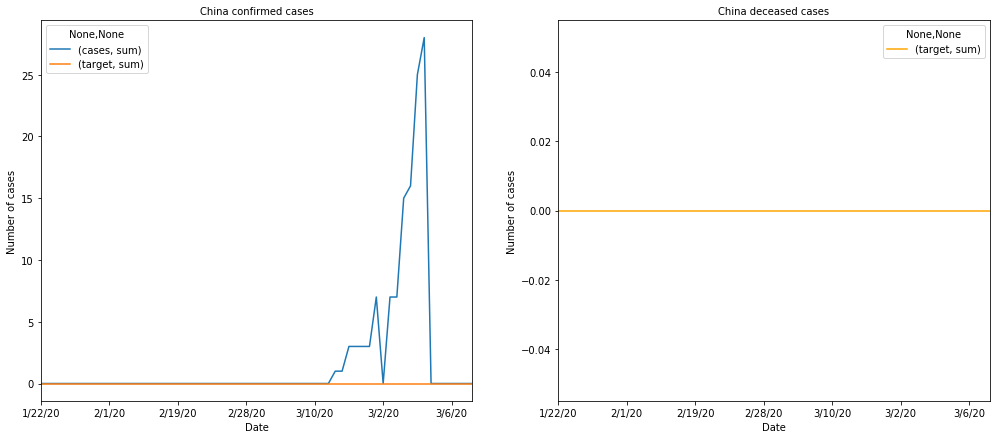

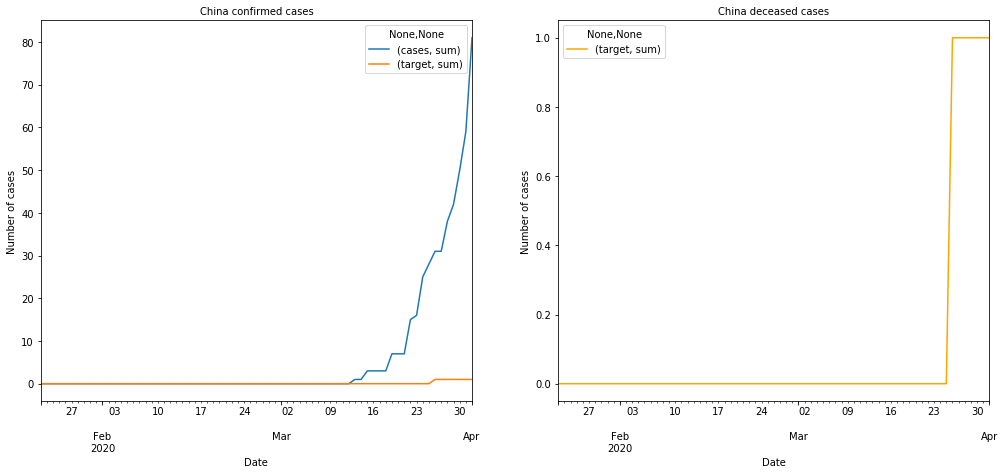

In [113]:
#for week one
confirmed_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week two
confirmed_total_date_kenya = data1[data1['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data1[data1['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week 3
confirmed_total_date_kenya = data2[data2['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data2[data2['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for last week of prediction
confirmed_total_date_kenya = data3[data3['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data3[data3['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

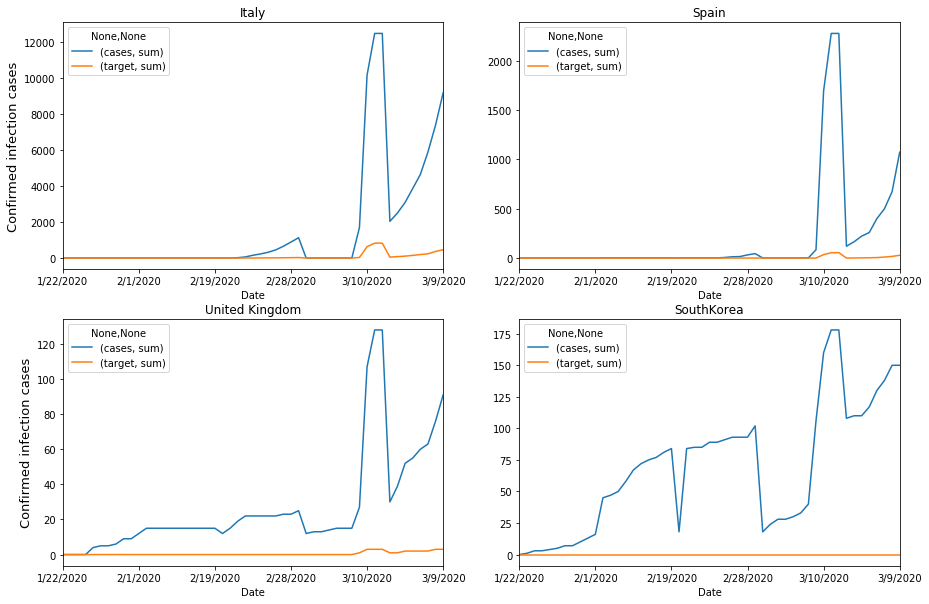

In [114]:
#looking at the worst hit countries as of now for week one
#Italy
confirmed_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

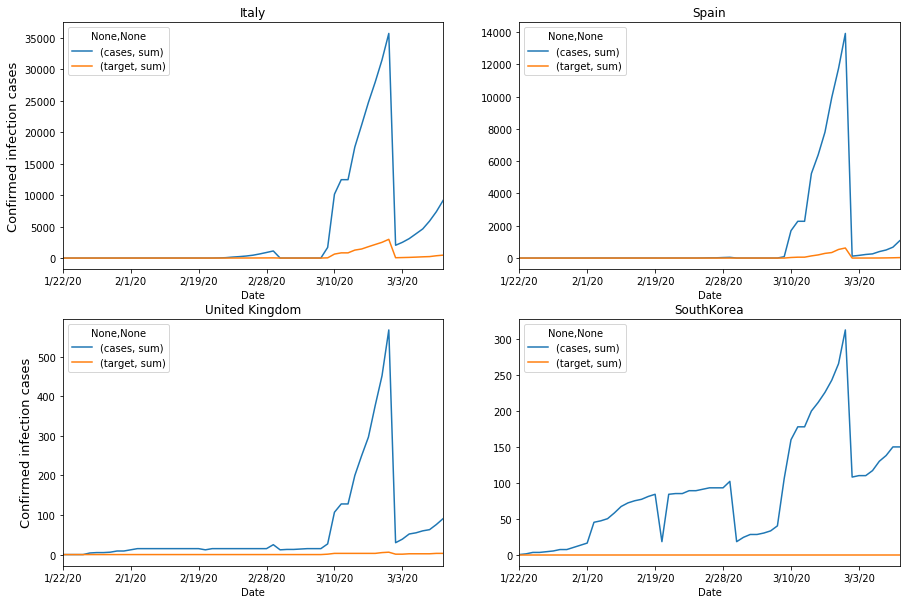

In [115]:
#looking at the worst hit countries as of now for week 2
#Italy
confirmed_total_date_Italy = data1[data1['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data1[data1['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data1[data1['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data1[data1['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data1[data1['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data1[data1['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data1[data1['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data1[data1['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data1[data1['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data1[data1['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

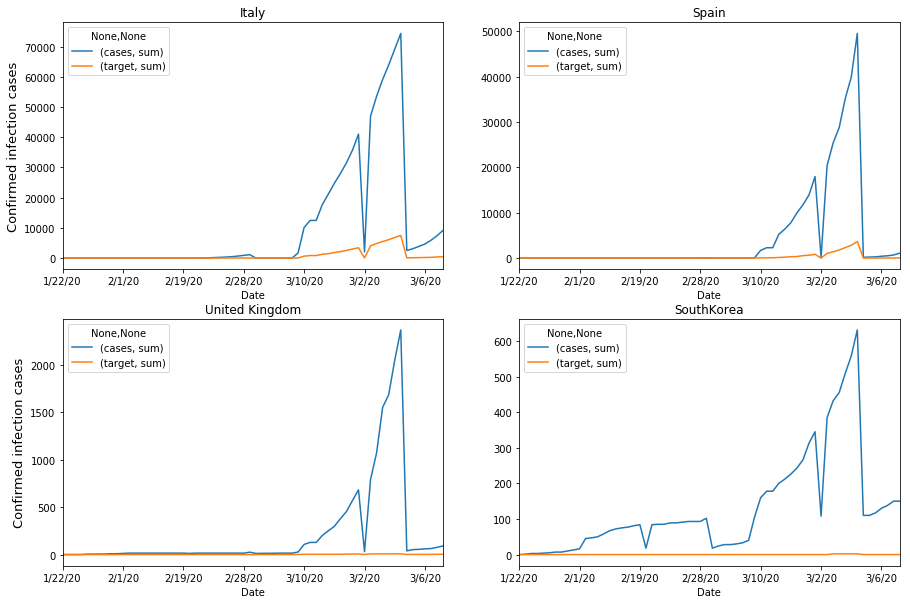

In [116]:
#looking at the worst hit countries as of now for week 3
#Italy
confirmed_total_date_Italy = data2[data2['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data2[data2['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data2[data2['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data2[data2['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data2[data2['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data2[data2['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data2[data2['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data2[data2['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data2[data2['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data2[data2['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

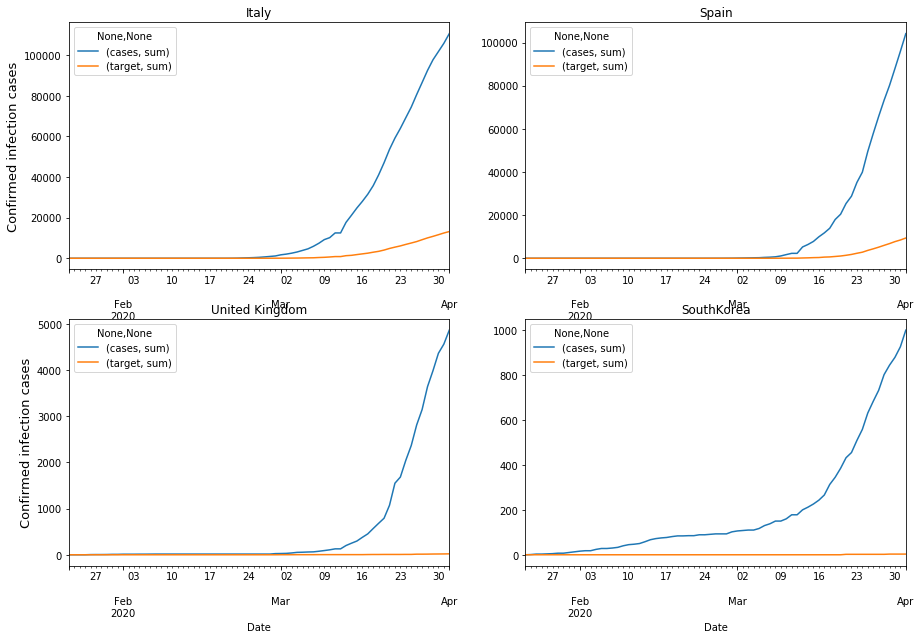

In [117]:
#looking at the worst hit countries as of now for last week of the prediction 
#Italy
confirmed_total_date_Italy = data3[data3['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data3[data3['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data3[data3['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data3[data3['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data3[data3['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data3[data3['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data3[data3['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data3[data3['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data3[data3['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data3[data3['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

In [118]:
#what type of data can we deduce from the given data
#we can get the mortality rate in the countries as of the beginning of the beginning and we will compare with other weeks
data3.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26


In [119]:
#calculating the difference between cases and target that will help in getting mortality rate in different weeks
data['diff']=data['cases'] - data['target']
#week one diff
data1['diff']=data1['cases'] - data1['target']
#week two diff
data2['diff']=data2['cases'] - data2['target']
#week last diff
data3['diff']=data3['cases'] - data3['target']

In [120]:
#lets look through the three developed diff columns and see whether their are any missing values
#for the first dataset
print(data.isna().any())
print(data.isna().sum())
#for the second dataset
print(data1.isna().any())
print(data1.isna().sum())
#for the third dataset
print(data2.isna().any())
print(data2.isna().sum())
#for the last dataset
print(data3.isna().any())
print(data3.isna().sum())

Territory X Date    False
target              False
cases               False
Territory           False
Date                False
Continent           False
diff                False
dtype: bool
Territory X Date    0
target              0
cases               0
Territory           0
Date                0
Continent           0
diff                0
dtype: int64
Territory X Date    False
target              False
cases               False
Territory           False
Date                False
diff                False
dtype: bool
Territory X Date    0
target              0
cases               0
Territory           0
Date                0
diff                0
dtype: int64
Territory X Date    False
target              False
cases               False
Territory           False
Date                False
diff                False
dtype: bool
Territory X Date    0
target              0
cases               0
Territory           0
Date                0
diff                0
dtype: int64
Territory X D

In [125]:
'''#calculating the increase in the number of cases between the weeks
data['weekoneincrease']=data1['cases'] - data['cases']
data['weektwoincreasefromweekone']=data2['cases'] - data1['cases']
this is no necessary just calculate the values in a descending order
'''
#calculate the rise in cases by subtracting the previous value of a row with another 
#data1["risen cases"] = data1["cases"].diff(-1)
#we use the +ve notation since we want o subtract one from the next
data3["risen cases"] = data3["cases"].diff(1)

In [130]:
#replacing the first value with a zero
data3["risen cases"]=data3['risen cases'].replace(np.nan, 0.00, regex=True)

In [131]:
#checking whether there are any zero values in our latest dataset
print(data3.isna().sum())

Territory X Date       0
target                 0
cases                  0
Territory              0
Date                   0
diff                   0
risen cases            0
risen targets daily    0
dtype: int64


In [132]:
#lets also add a column of the rise in deaths to our latest data set
data3["risen targets daily"] = data3["target"].diff(1)
#change the value of the first loc[0] to a 0
data3['risen targets daily'] = data3['risen targets daily'].replace(np.nan, 0.00, regex=True)

In [133]:
#checking whether the difference column has been created
data3.head()

,Territory X Date,target,cases,Territory,Date,diff,risen cases,risen targets daily
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,0,0.0,0.0
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,0,0.0,0.0
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,0,0.0,0.0
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,0,0.0,0.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,0,0.0,0.0


In [134]:
#calculating the mortality rates of different Territories rounded off to two decimal places
#last week mortality rate
data3['mortality rate last week'] = round((data3['diff']/data3['cases']) * 100,2)

In [135]:
#looking at the data type for the various columns that we have
print(data3.dtypes)

Territory X Date                    object
target                               int64
cases                                int64
Territory                           object
Date                        datetime64[ns]
diff                                 int64
risen cases                        float64
risen targets daily                float64
mortality rate last week           float64
dtype: object


In [136]:
#checking the values for mortality rate
print("mortality rates in last week: ", data3['mortality rate last week'].unique())

mortality rates in last week:  [   nan 100.    97.5   98.65  97.62  95.74  96.36  96.67  97.65  97.7
  98.31  91.67  95.65  96.97  97.37  98.04  98.18  96.61  96.88  97.14
  97.75  96.15  95.93  96.58  96.55  95.7   94.92  95.28  95.07  93.83
  94.21  95.83  92.31  91.89  92.59  93.33  90.54  89.66  87.78  89.21
  91.54  92.61  92.8   93.05  93.19  93.64  93.61  93.93  94.01  93.85
  93.15  99.12  99.25  99.39  99.47  98.66  98.88  99.03  98.2   97.84
  96.81  96.41  71.43  75.    94.12  94.74  93.55  95.56  96.43  97.06
  97.47  96.91  97.66  98.5   98.67  98.45  97.93  98.21  97.79  97.39
  97.45  97.2   97.44  97.34  99.66  99.7   99.75  99.29  99.38  99.44
  99.3   96.3   96.83  96.05  96.7   98.8   98.99  99.2   98.89  98.94
  99.35  99.55  99.58  99.61  99.54  99.59  99.62  99.6   99.67  99.8
  99.85  99.88  99.71  99.77  99.76  99.72  99.53  99.46  99.24  99.18
  99.02  98.74  98.64  97.73  98.11  98.46  98.61  98.85  97.85  97.54
  97.8   98.09  98.53  98.32  95.24  99.56  99.6

In [137]:
data3.head()

,Territory X Date,target,cases,Territory,Date,diff,risen cases,risen targets daily,mortality rate last week
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,0,0.0,0.0,NaN
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,0,0.0,0.0,NaN
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,0,0.0,0.0,NaN
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,0,0.0,0.0,NaN
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,0,0.0,0.0,NaN


In [138]:
#replacing the Nans in the mortality rate with 0.00
data3['mortality rate last week'] = data3['mortality rate last week'].replace(np.nan, 0.00, regex=True)

In [139]:
#looking to see if the head has changed 
data3.head()

,Territory X Date,target,cases,Territory,Date,diff,risen cases,risen targets daily,mortality rate last week
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,0,0.0,0.0,0.0
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,0,0.0,0.0,0.0
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,0,0.0,0.0,0.0
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,0,0.0,0.0,0.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,0,0.0,0.0,0.0


In [140]:
#pip install pycountry-convert
#using pycountry-convert in kaggle turned out to be a deliberate scam and it did not work out in my favor
#used the alternative which is to tweak the dataset in excel manually and added the column for the continent

In [141]:
'''#lets group the respective Territories to their Continents this may help in organizing per R0
import pycountry_convert as pc

country_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")
print(country_code)
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)'''

'#lets group the respective Territories to their Continents this may help in organizing per R0\nimport pycountry_convert as pc\n\ncountry_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")\nprint(country_code)\ncontinent_name = pc.country_alpha2_to_continent_code(country_code)\nprint(continent_name)'

In [142]:
'''the next part is to check the modal split of the individual continents but there was lack of data for the various
continents especially Africa so lets look at sth that we have data on which is which countries have put up stringent
measures and with those we can use the R0 as a little less than others where people still move freely
'''

'the next part is to check the modal split of the individual continents but there was lack of data for the various\ncontinents especially Africa so lets look at sth that we have data on which is which countries have put up stringent\nmeasures and with those we can use the R0 as a little less than others where people still move freely\n'

In [143]:
'''
for places with high laws on covid we use 3,medium we use 2 and low we use 1 and very low 0
adapted from https://www.weforum.org/agenda/2020/03/coronavirus-this-is-how-the-world-is-responding/ and
https://www.vox.com/science-and-health/2020/3/22/21189889/coronavirus-covid-19-pandemic-response-south-korea-phillipines-italy-nicaragua-senegal-hong-kong
https://www.nation.co.ke/news/How-countries-are-battling-coronavirus/1056-5502012-147wgeoz/index.html
http://www.xinhuanet.com/english/2020-03/16/c_138883650.htm
'''
def label_race (row):
    if row['Territory'] == 'Republic of Korea (the)' :
        return 3
    if row['Territory'] == 'United States of America (the)' :
        return 2
    if row['Territory'] == 'Philippines (the)':
        return 1
    if row['Territory']  == 'Nicaragua':
        return 0
    if row['Territory'] == 'Italy':
        return 1
    if row['Territory'] == 'Senegal':
        return 3
    if row['Territory'] == 'Singapore':
        return 3
    if row['Territory'] == 'Tunisia':
        return 2
    if row['Territory'] == 'Kenya':
        return 2
    if row['Territory'] == 'France':
        return 2
    if row['Territory'] == 'Iran (Islamic Republic of)':
        return 1
    if row['Territory'] == 'Germany':
        return 2
    if row['Territory'] == 'Switzerland':
        return 2
    if row['Territory'] == 'Austria':
        return 1
    if row['Territory'] == 'China':
        return 3
    if row['Territory'] == 'Japan':
        return 2
    if row['Territory'] == 'Saudi Arabia':
        return 3
    if row['Territory'] == 'Egypt':
        return 3
    if row['Territory'] == 'United Kingdom of Great Britain and Northern Ireland (the)':
        return 2
    if row['Territory'] == 'South Africa':
        return 2
    if row['Territory'] == 'Uganda':
        return 1
    if row['Territory'] == 'Argentina':
        return 2
    if row['Territory'] == 'Serbia':
        return 3
    if row['Territory'] == 'Czechia':
        return 2
    if row['Territory'] == 'Mexico':
        return 1
    if row['Territory'] == 'Iraq':
        return 2
    if row['Territory'] == 'Astralia':
        return 2
    return 0
#data.apply (lambda row: label_race(row), axis=1)
data3['Stringent'] = data3.apply (lambda row: label_race(row), axis=1)

In [144]:
data3.head()

,Territory X Date,target,cases,Territory,Date,diff,risen cases,risen targets daily,mortality rate last week,Stringent
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,0,0.0,0.0,0.0,0
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,0,0.0,0.0,0.0,0
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,0,0.0,0.0,0.0,0
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,0,0.0,0.0,0.0,0
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,0,0.0,0.0,0.0,0


In [145]:
#checking to see if the values for the Stringent stuck
print("Number of unique values for the Stringent column: ", data3['Stringent'].nunique())

Number of unique values for the Stringent column:  4


In [ ]:
#checking for the data types of all columns
print(data3.dtypes)

In [ ]:
#checking out the data
data.head()

In [ ]:
#copy the column data continent to data2 continent
data2['continent']=data['Continent']

In [ ]:
data2.head()

In [ ]:
'''pre processing and this will be used to make sure that you convert all the object columns into sth that can be 
used to train the model and in this we are going to be using xgboost
for the conversion from categorical to interger we are going to use a function in case we need to re use
function at a later time

from sklearn.preprocessing import OrdinalEncoder
def categoricalToInteger(data2):
    #Define Ordinal Encoder Model
    oe = OrdinalEncoder()
    data2[['Territory X Date','Territory','Continent']] = oe.fit_transform(data2.loc[:,['Territory X Date','Territory','Continent']])
    return data2
#apply the function
data2 = categoricalToInteger(data2)
'''

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
def categoricalToInteger(data2):
    #Define Ordinal Encoder Model
    oe = OrdinalEncoder()
    data2[['Territory X Date','Territory']] = oe.fit_transform(data2.loc[:,['Territory X Date','Territory']])
    return data2
#apply the function
data2 = categoricalToInteger(data2)

In [ ]:
data2.head()

In [ ]:
'''we know that the more data we have the better our model will actually become so we can use this to our 
advantage and split the date column to have more data from it
'''
import datetime as dt
def create_features(data2):
    data2['day'] = data2['Date'].dt.day
    data2['month'] = data2['Date'].dt.month
    data2['dayofweek'] = data2['Date'].dt.dayofweek
    data2['dayofyear'] = data2['Date'].dt.dayofyear
    data2['quarter'] = data2['Date'].dt.quarter
    data2['weekofyear'] = data2['Date'].dt.weekofyear
    return data2
#apply the function
data2 = create_features(data2)

In [ ]:
data2.head()

In [ ]:
# lets drop the diff column since it was only used to calculate the mortality rate 
data2=data2.drop(['diff'], axis=1)

In [ ]:
data2.head()

In [ ]:
#we can also acquire the percentage increase in mortality rate and infection rates and maybe the R0 